In [1]:
from scipy import sparse, io
import numpy as np
import pandas as pd
import cellex
import matplotlib

In [2]:
# Read sparse scRNA athero meta analyzed scRNA sct norm counts matrix. Loading the data like this takes only 4-5 mins as opposed of 1-2 hours 
# by using pd.read_csv
sparse_matrix = io.mmread("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/rds_objects/integration_rds_objects/rPCA/alsaigh_pan_wirka_hu_int/CELLECT_inputs/rpca_int_sct_v3_sct_sparse_matrix.txt")
m_dense = sparse_matrix.toarray()

In [3]:
# Read rownames and colnames csv files
row_names = np.genfromtxt("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/rds_objects/integration_rds_objects/rPCA/alsaigh_pan_wirka_hu_int/CELLECT_inputs/rpca_int_sct_v3_sct_matrix_rownames.txt",
                         dtype=str)
col_names = np.genfromtxt("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/rds_objects/integration_rds_objects/rPCA/alsaigh_pan_wirka_hu_int/CELLECT_inputs/rpca_int_sct_v3_sct_matrix_colnames.txt",
                         dtype=str)

In [5]:
# Export matrix to df format used as input for CELLEX
data = pd.DataFrame(m_dense, columns=col_names, index=row_names)
data.head()

,AAACCCACAAAGGATT_1,AAACCCAGTCACCACG_1,AAACCCAGTGTGTGGA_1,AAACCCATCTTGGTCC_1,AAACGAAAGATGTAGT_1,AAACGAACACGCTTAA_1,AAACGAAGTTCGAGCC_1,AAACGAATCTGCGGAC_1,AAACGCTAGCGAAACC_1,AAAGGATCAAGGGTCA_1,...,TTTGTCAAGGAATGGA-1_15,TTTGTCAAGGTGATTA-1_15,TTTGTCAAGTGGGATC-1_15,TTTGTCACAAGCGCTC-1_15,TTTGTCACAGTCCTTC-1_15,TTTGTCAGTACTCAAC-1_15,TTTGTCAGTCTTGATG-1_15,TTTGTCAGTGAAAGAG-1_15,TTTGTCAGTTAAGACA-1_15,TTTGTCATCGGCATCG-1_15
AL627309.1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL669831.5,0.0,0.0,0.693147,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LINC00115,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM41C,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL645608.1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Save meta analyzed athero scrna matrix to txt
#scrna_athero_df.to_csv("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/rds_objects/integration_rds_objects/rPCA/alsaigh_pan_wirka_hu_int/CELLECT_inputs/rpca_int_sct_v3_norm_counts.csv",
#                      header=True, index=True)

In [6]:
# Load metadata
metadata = pd.read_csv("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/rds_objects/integration_rds_objects/rPCA/alsaigh_pan_wirka_hu_int/CELLECT_inputs/rpca_int_sct_v3_level1_cell_type_annotations_metadata.csv")
metadata.head()

,Unnamed: 0,cell_type
0,AAACCCACAAAGGATT_1,SMC
1,AAACCCAGTCACCACG_1,SMC
2,AAACCCAGTGTGTGGA_1,SMC
3,AAACCCATCTTGGTCC_1,SMC
4,AAACGAAAGATGTAGT_1,SMC


In [7]:
# Check how many cells we have per cell type
print(metadata.groupby("cell_type").cell_type.count())

cell_type
B_cell          1946
Endothelial    12679
Fibroblast     20683
Macrophage     22914
Mast_cell       1228
Neuron           482
Pericyte        4762
Plasma_cell      431
SMC            29024
T_NK           24257
pDC              172
Name: cell_type, dtype: int64


In [9]:
# Set first columns as index. This needs to be done so that genes don't get mistaken as expression values. Also the metadata file should have only the cell_type column and cell barcodes
# as row names
metadata = metadata.set_index("Unnamed: 0")
metadata.head()

KeyError: "None of ['Unnamed: 0'] are in the columns"

In [10]:
# Create ESObject and compute Expression Specificity
eso = cellex.ESObject(data=data, annotation=metadata, verbose=True)
eso.compute(verbose=True)

Preprocessing - checking input ... input parsed in 0 min 0 sec
Preprocessing - running remove_non_expressed ... excluded 3027 / 23381 genes in 0 min 9 sec
Preprocessing - normalizing data ... data normalized in 0 min 54 sec
Preprocessing - running ANOVA ... excluded 1536 / 20354 genes in 1 min 15 sec
Computing DET ... 
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 20 sec
Computing EP ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 0 sec
Computing GES ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 31 sec
Computing NSI ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 0 sec
Computing ESmu ...
    finished in 0 min 0 sec
Computing ESsd ...
    finished in 0 min 0 sec
Computed ['det.esw', 'det.esw_null', 'det.pvals', 'det.esw_s', 'ep.esw', 'ep.esw_null', 'ep.pvals', 'ep.esw_s', 'ges.esw', 'ges.esw_null', 'ges.pvals', 'ges.esw_s', 'nsi.esw', 'nsi.esw_null', 'nsi.pvals', '

In [17]:
# Check expression specificity results
eso.results["esmu"].head()
eso.results["esmu"].loc[["MYH11", "CNN1", "ACTA2", "TNFRSF11B", "KRT7", "IGFBP2", "TNFAIP6",  "VCAN", "CRTAC1" ,"FN1", "AEBP1", "TNFRSF11B", "CD14", "FBLN1", "PECAM1", "CDH5", "NKG7", "CD8A", "C7", "C3", 
                        "IGHM", "JCHAIN", "MZB1", "IGLC3", "IL1B", "IBSP", "PECAM1", "LMOD1", "COL4A1", "COL4A2", "COL6A3", "TCF21"]]

,B_cell,Endothelial,Fibroblast,Macrophage,Mast_cell,Neuron,Pericyte,Plasma_cell,SMC,T_NK,pDC
gene,,,,,,,,,,,
MYH11,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.688384,0.000000,0.832034,0.000000,0.000000
CNN1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.912543,0.000000,0.929264,0.000000,0.000000
ACTA2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.737924,0.000000,0.744530,0.000000,0.000000
TNFRSF11B,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.915294,0.000000,0.000000
KRT7,0.000000,0.082973,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.966529,0.000000,0.000000
IGFBP2,0.000000,0.444895,0.000000,0.000000,0.0,0.000000,0.285993,0.000000,0.888583,0.000000,0.000000
TNFAIP6,0.000000,0.000000,0.705487,0.000000,0.0,0.513983,0.000000,0.000000,0.244551,0.000000,0.000000
VCAN,0.000000,0.000000,0.103906,0.006214,0.0,0.000000,0.000000,0.000000,0.876541,0.000000,0.000000
CRTAC1,0.000000,0.825579,0.000000,0.000000,0.0,0.006978,0.000000,0.000000,0.050416,0.000000,0.000000


In [15]:
# Check conversion and save results
eso.results["esmu"].head()
eso.save_as_csv(file_prefix="rpca_int_sct_v3_level1_annotations_expression_specificity_gene_symbols", path="/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/rds_objects/integration_rds_objects/rPCA/alsaigh_pan_wirka_hu_int/CELLECT_inputs/CELLEX_files/")

In [16]:
# Map gene symbols to human Ensembl gene IDs. Ensembl IDs are required for CELLECT. 
ensembl_ids = cellex.utils.mapping.human_symbol_to_human_ens(eso.results["esmu"], drop_unmapped=True, verbose=True)

Mapping: human gene symbols --> human ensembl gene id's ...
6.41 pct of genes are unmapped ...
Removed 1206 unmapped genes ...


AttributeError: 'NoneType' object has no attribute 'head'

In [18]:
# Check expression specificity df with ensembl ids
eso.results["esmu"].head()
eso.save_as_csv(file_prefix="rpca_int_sct_v3_level1_annotations_expression_specificity_Ensembl_IDs", path="/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/rds_objects/integration_rds_objects/rPCA/alsaigh_pan_wirka_hu_int/CELLECT_inputs/CELLEX_files/")

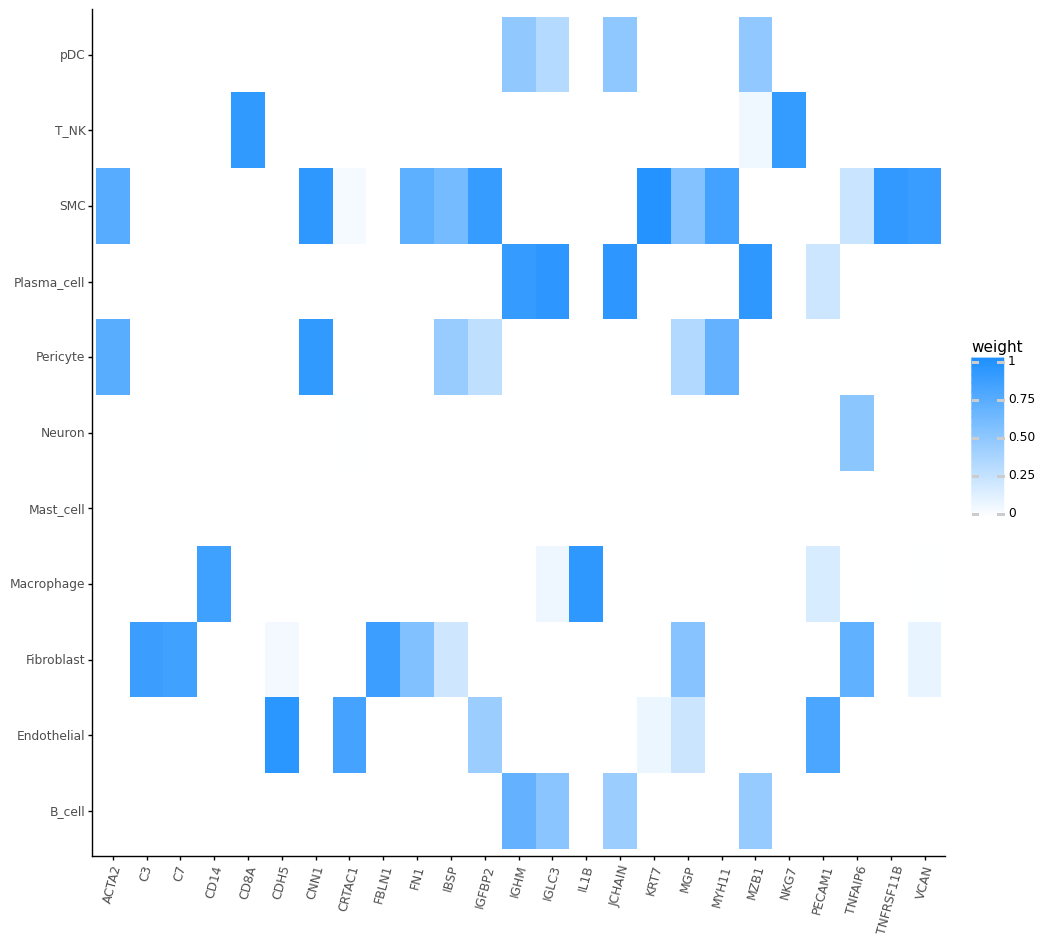

<ggplot: (8749434711462)>

In [21]:
# Plot expression specificity results
interesting_genes = ["MYH11", "CNN1", "ACTA2", "TNFRSF11B", "MGP", "KRT7", "IGFBP2", "TNFAIP6",  "VCAN", "CRTAC1" ,"FN1", "CNN1", "TNFRSF11B", "CD14", "FBLN1", "PECAM1", "CDH5", "NKG7", "CD8A", "C7", "C3", 
                        "IGHM", "JCHAIN", "MZB1", "IGLC3", "IL1B", "IBSP"]
df_esmu = eso.results["esmu"].copy()
p_heatmap = cellex.plotting.heatmap(df_esmu, genes=interesting_genes)
p_heatmap

In [30]:
# Load data and metadata for SMC subtypes
data = pd.read_csv("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/rds_objects/integration_rds_objects/rPCA/alsaigh_pan_wirka_hu_int/CELLECT_inputs/LDSC_SMC/rpca_smc_sct_norm_counts_matrix.csv")
metadata = pd.read_csv("/project/cphg-millerlab/Jose/human_scRNA_meta_analysis/rds_objects/integration_rds_objects/rPCA/alsaigh_pan_wirka_hu_int/CELLECT_inputs/LDSC_SMC/smc_rpca_int_sct_prelim_annotations_metadata.csv")


In [33]:
# Check input files
data.head()
metadata.head()

,Unnamed: 0,cell_type
0,AAACCCACAAAGGATT_1,Transitional-ECM-SMC
1,AAACCCAGTCACCACG_1,Transitional-ECM-SMC
2,AAACCCAGTGTGTGGA_1,Transitional-ECM-SMC
3,AAACGAACACGCTTAA_1,Contractile_SMC
4,AAACGAAGTTCGAGCC_1,Transitional-ECM-SMC


In [35]:
# Check dims of data files and count how many cells we have per cell type
metadata.shape
print(metadata.groupby("cell_type").cell_type.count())

cell_type
Contractile_SMC          7141
Fibrochondrocyte         1097
Fibromyocyte             2975
Transitional-ECM-SMC    11061
Name: cell_type, dtype: int64


In [36]:
# Set first columns as index. This needs to be done so that genes don't get mistaken as expression values. Also the metadata file should have only the cell_type column and cell barcodes
# as row names
data = data.set_index("Unnamed: 0")
metadata = metadata.set_index("Unnamed: 0")

In [37]:
metadata.head()

,cell_type
Unnamed: 0,
AAACCCACAAAGGATT_1,Transitional-ECM-SMC
AAACCCAGTCACCACG_1,Transitional-ECM-SMC
AAACCCAGTGTGTGGA_1,Transitional-ECM-SMC
AAACGAACACGCTTAA_1,Contractile_SMC
AAACGAAGTTCGAGCC_1,Transitional-ECM-SMC


In [38]:
# Create ESObject and compute Expression Specificity
eso = cellex.ESObject(data=data, annotation=metadata, verbose=True)
eso.compute(verbose=True)

Preprocessing - checking input ... input parsed in 0 min 0 sec
Preprocessing - running remove_non_expressed ... excluded 4372 / 23381 genes in 0 min 1 sec
Preprocessing - normalizing data ... data normalized in 0 min 9 sec
Preprocessing - running ANOVA ... excluded 9699 / 19009 genes in 0 min 9 sec
Computing DET ... 
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 1 sec
Computing EP ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 0 sec
Computing GES ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 2 sec
Computing NSI ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 0 sec
Computing ESmu ...
    finished in 0 min 0 sec
Computing ESsd ...
    finished in 0 min 0 sec
Computed ['det.esw', 'det.esw_null', 'det.pvals', 'det.esw_s', 'ep.esw', 'ep.esw_null', 'ep.pvals', 'ep.esw_s', 'ges.esw', 'ges.esw_null', 'ges.pvals', 'ges.esw_s', 'nsi.esw', 'nsi.esw_null', 'nsi.pvals', 'nsi.

In [40]:
# Check expression specificity results
eso.results["esmu"].head()
eso.results["esmu"].loc[["MYH11", "CNN1", "ACTA2", "LMOD1", "TAGLN", "TNFRSF11B", "KRT17", "IGFBP2", "TNFAIP6",  "VCAN", "CRTAC1" ,"FN1", "CNN1", "TNFRSF11B", "COMP", 
                         "MGP", "CYTL1", "CLU", "COL1A2", "COL1A1", "SOX9", "RUNX2"]]

,Contractile_SMC,Fibrochondrocyte,Fibromyocyte,Transitional-ECM-SMC,nan
gene,,,,,
MYH11,0.237684,0.000000,0.000000,0.000000,0.192668
CNN1,0.392964,0.000000,0.000000,0.000000,0.025562
ACTA2,0.238246,0.000000,0.000000,0.114575,0.175358
LMOD1,0.238451,0.000000,0.000000,0.000000,0.044990
TAGLN,0.241363,0.000000,0.000000,0.229970,0.212168
TNFRSF11B,0.000000,0.000000,0.267619,0.275258,0.000000
KRT17,0.000000,0.153213,0.562243,0.374921,0.000000
IGFBP2,0.000000,0.000000,0.240799,0.237490,0.134458
TNFAIP6,0.000000,0.628325,0.342023,0.000000,0.000000


In [29]:
metadata.isnull().values.any()

False